<a href="https://colab.research.google.com/github/abeyp/coronary-heart-disease-analysis/blob/main/cad_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis on Coronary Artery Disease Diagnosis

dataset obtained from:
* Kaggle: https://www.kaggle.com/sid321axn/heart-statlog-cleveland-hungary-final
* CAD Dataset: http://www.cadataset.com/

## Dataset description
This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

1. Age: Patients Age in years (Numeric)
2. Sex: Gender of patient (Male - 1, Female - 0) (Nominal)
3. Chest Pain Type: Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non- anginal pain, 4 asymptomatic (Nominal)
4. resting bp s: Level of blood pressure at resting mode in mm/HG (Numerical)
5. cholestrol: Serum cholestrol in mg/dl (Numeric)
6. fasting blood sugar: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. resting ecg: Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)
8. max heart rate: Maximum heart rate achieved (Numeric)
9. exercise angina: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in comparison with the state of rest (Numeric)
11. ST slope: ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)

Target variable
12. target: It is the target variable which we have to 
predict 1 means patient is suffering from heart risk and 0 means patient is normal.

# Import Libraries & Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns

In [ ]:
#Loading Dataset if on local

from google.colab import files
uploaded = files.upload()

Saving heart_statlog_cleveland_hungary_final.csv to heart_statlog_cleveland_hungary_final (5).csv


In [ ]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

# Data Cleaning

In [ ]:
df.columns = df.columns.str.replace(' ','_')
df.columns = [x.lower() for x in df.columns]
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
chest_check = df['chest_pain_type'].isin([1,2,3,4])
chest_pain_tmp = df[chest_check]

In [ ]:
chest_pain_tmp.shape == df['chest_pain_type'].shape

False

Rename Nominal Values in Columns

In [ ]:
# Rename nominal values

df['sex'] = df['sex'].map({1:'male', 0:'female'})
df['chest_pain_type'] = df['chest_pain_type'].map({1:'typical', 2:'typical angina',3:'non-anginal pain',4:'asymptomatic'})
df['exercise_angina'] = df['exercise_angina'].map({0:'False',1:'True'})
df['st_slope'] = df['st_slope'].map({0:'Normal',1:'Upsloping',2:'Flat',3:'Downsloping'})

df.head(10)

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40,male,typical angina,140,289,0,0,172,False,0.0,Upsloping,0
1,49,female,non-anginal pain,160,180,0,0,156,False,1.0,Flat,1
2,37,male,typical angina,130,283,0,1,98,False,0.0,Upsloping,0
3,48,female,asymptomatic,138,214,0,0,108,True,1.5,Flat,1
4,54,male,non-anginal pain,150,195,0,0,122,False,0.0,Upsloping,0
5,39,male,non-anginal pain,120,339,0,0,170,False,0.0,Upsloping,0
6,45,female,typical angina,130,237,0,0,170,False,0.0,Upsloping,0
7,54,male,typical angina,110,208,0,0,142,False,0.0,Upsloping,0
8,37,male,asymptomatic,140,207,0,0,130,True,1.5,Flat,1
9,48,female,typical angina,120,284,0,0,120,False,0.0,Upsloping,0


# Histogram Overview

In [ ]:
plt.style.use('seaborn')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21af5db650>,
      dtype=object)

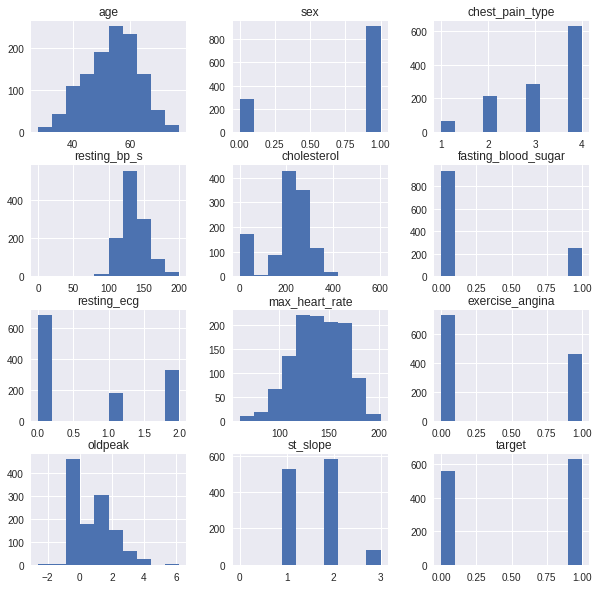

In [ ]:
df.hist(figsize=(10,10))

In [ ]:
df.describe()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Creating dataframes for normal patients with target = 0 and at risk patients with target = 1

In [ ]:
df_healthy = df[df['target'] == 0]
df_healthy.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
2,37,1,2,130,283,0,1,98,0,0.0,1,0
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0


In [ ]:
df_sick = df[df['target'] == 1]
df_sick.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
1,49,0,3,160,180,0,0,156,0,1.0,2,1
3,48,0,4,138,214,0,0,108,1,1.5,2,1
8,37,1,4,140,207,0,0,130,1,1.5,2,1
11,58,1,2,136,164,0,1,99,1,2.0,2,1
13,49,1,4,140,234,0,0,140,1,1.0,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21af8b7e10>,
      dtype=object)

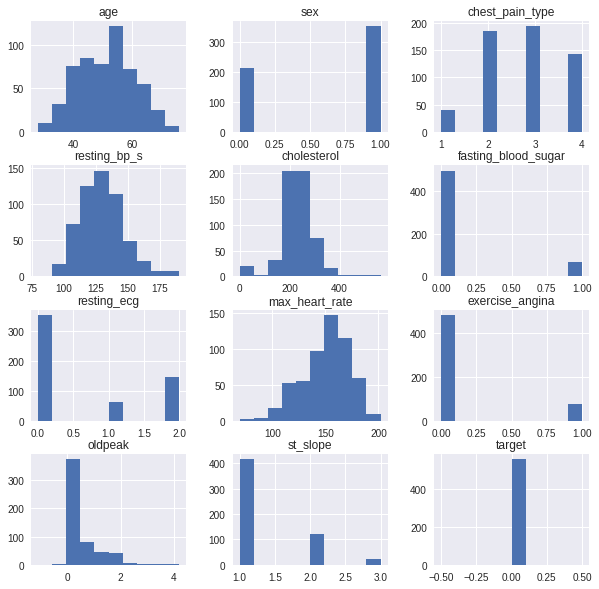

In [ ]:
df_healthy.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21aec316d0>,
      dtype=object)

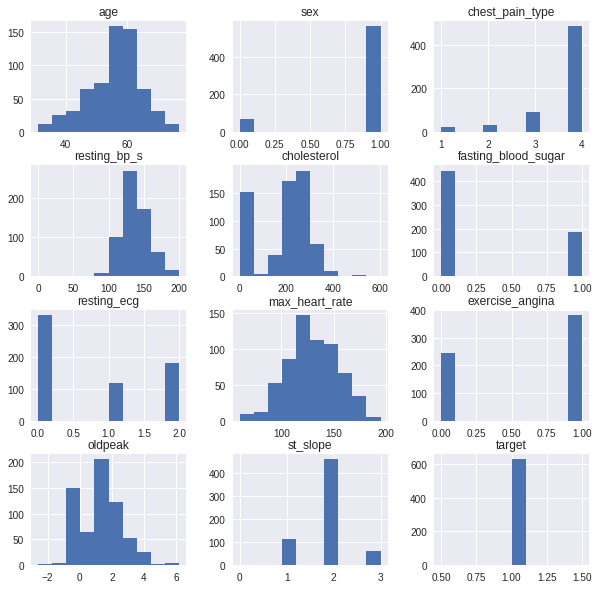

In [ ]:
df_sick.hist(figsize=(10,10))

In [ ]:
df_healthy.describe()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.0
mean,51.124777,0.623886,2.777184,129.793226,231.657754,0.119430,0.631016,150.894831,0.139037,0.464706,1.297683,0.0
std,9.493914,0.484842,0.909423,16.490474,70.021658,0.324583,0.868723,22.704971,0.346294,0.733243,0.536668,0.0
min,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-1.100000,1.000000,0.0
25%,44.000000,0.000000,2.000000,120.000000,201.000000,0.000000,0.000000,137.000000,0.000000,0.000000,1.000000,0.0
50%,51.000000,1.000000,3.000000,130.000000,232.000000,0.000000,0.000000,154.000000,0.000000,0.000000,1.000000,0.0
75%,57.000000,1.000000,4.000000,140.000000,268.000000,0.000000,2.000000,169.000000,0.000000,0.800000,2.000000,0.0
max,76.000000,1.000000,4.000000,190.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,0.0


In [ ]:
df_sick.describe()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.0
mean,56.034976,0.888712,3.639110,134.259141,191.372019,0.297297,0.758347,129.777424,0.608903,1.331320,1.915739,1.0
std,8.605215,0.314738,0.754053,19.670323,119.734612,0.457432,0.868109,23.718521,0.488384,1.183346,0.518041,0.0
min,31.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,1.0
25%,51.000000,1.000000,4.000000,120.000000,126.000000,0.000000,0.000000,113.000000,0.000000,0.100000,2.000000,1.0
50%,57.000000,1.000000,4.000000,132.000000,226.000000,0.000000,0.000000,128.000000,1.000000,1.200000,2.000000,1.0
75%,62.000000,1.000000,4.000000,145.000000,274.000000,1.000000,2.000000,147.000000,1.000000,2.000000,2.000000,1.0
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,195.000000,1.000000,6.200000,3.000000,1.0


## Thoughts:
* Age: CAD found very high around 50s - 60s
* Sex: CAD more prevalent in males than females
* Chest pains: many are asymptomatic with CAD, versus comparable numbers for pains from 1-3 among healthy and non-healthy.
* resting bp/s: For non-healthy, much higher distribution than healthy. 
* cholesterol: looks about the same 
* Max heart rate: 

Will conduct analysis on healthy and non-healthy
then compare between sex on healthy and non-healthy

Breakdown percentage of healthy and non-healthy based on age groups



Ideas: 
* estimate distribution between variables (plot normal curves of healthy vs non-healthy)
* Correlations between continuous variables
* Group by age: look at distribution of healthy and non-healthy on a graph
* Group by sex: graph
* look at healthy cholestrol levels and plot against healthy vs non-healthy on scatter plot
* what type of heart disease

statistical tests of significance
* t-test
* chi-score test

make a predictor: if they are healthy, what type of heart disease

evaluate the predictor

In [ ]:
df_healthy['age'].std()

9.493913990133365

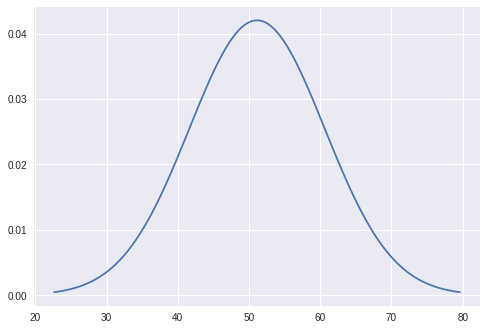

In [ ]:
#Normal Distribution for 'Age' of Healthy

age_hlty_mu = df_healthy['age'].mean()
age_hlty_sigma = df_healthy['age'].std()
x = np.linspace(age_hlty_mu - 3*age_hlty_sigma, age_hlty_mu + 3*age_hlty_sigma, 100)
plt.plot(x, stats.norm.pdf(x, age_hlty_mu, age_hlty_sigma))
plt.show()

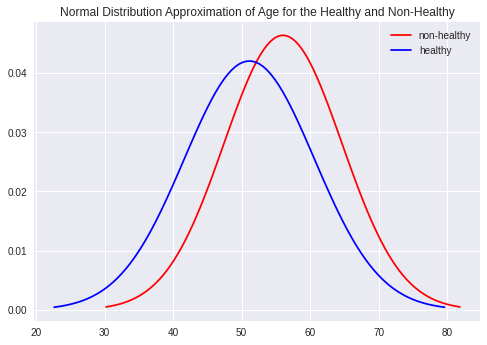

In [ ]:
#Normal Distribution for 'Age' of Non-Healthy

#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')

age_nh_mu = df_sick['age'].mean()
age_nh_sigma = df_sick['age'].std()
x = np.linspace(age_nh_mu - 3*age_nh_sigma, age_nh_mu + 3*age_nh_sigma, 100)
plt.plot(x, stats.norm.pdf(x, age_nh_mu, age_nh_sigma), label='non-healthy', color='red')

age_h_mu = df_healthy['age'].mean()
age_h_sigma = df_healthy['age'].std()
x = np.linspace(age_h_mu - 3*age_h_sigma, age_h_mu + 3*age_h_sigma, 100)
plt.plot(x, stats.norm.pdf(x, age_h_mu, age_h_sigma), label='healthy', color='blue')
plt.legend()
plt.title("Normal Distribution Approximation of Age for the Healthy and Non-Healthy")
plt.show()

# Exploratory Data Analysis

## Age Group Buckets

In [ ]:
#Age Group Buckets
age_bucket = {1: "0-18", 2: "19-25", 3: "26-39", 4: "40-49", 5: "50-59",6:"60+"}

def age_bucket_func(age_str):
  #this function will take in the age string and output an age bucket
  age = int(age_str)
  if age >= 0 and age <= 18:
    return 1
  elif age >= 19 and age <=25:
    return 2
  elif age >=26 and age <=39:
    return 3
  elif age >=40 and age <= 49:
    return 4
  elif age >= 50 and age <=59:
    return 5
  elif age >= 60 and age <=100:
    return 6
  
assert age_bucket_func("51") == 5
assert age_bucket_func("3") == 1
assert age_bucket_func("19") == 2
assert age_bucket_func("26") == 3
assert age_bucket_func("41") == 4



df['age_bucket'] = df['age'].apply(age_bucket_func)

df['age_bucket_str'] = df['age_bucket'].map(age_bucket)
df[['age_bucket', 'age', 'age_bucket_str']].head()


,age_bucket,age,age_bucket_str
0,4,40,40-49
1,4,49,40-49
2,3,37,26-39
3,4,48,40-49
4,5,54,50-59


In [ ]:
df[df['age_bucket_str'] == '19-25'].head(10)

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target,age_bucket,age_bucket_str


In [ ]:
df_bucket_group = df.groupby(['age_bucket_str'])
df_bucket_group['target'].value_counts(normalize=True)


age_bucket_str  target
26-39           0         0.673913
                1         0.326087
40-49           0         0.627240
                1         0.372760
50-59           1         0.543568
                0         0.456432
60+             1         0.691395
                0         0.308605
Name: target, dtype: float64

In [ ]:
barWidth = .25
#create list of [healthy_Freq, non_healthy_freq] for each age group

data = []
age_bucket_values_sorted = []
for ab in list(age_bucket.values()):
  if ab == '0-18' or ab == '19-25':
    continue
  data_tmp = []
  sick_freq = df_bucket_group['target'].value_counts(normalize=True).loc[ab,'1']
  healthy_freq = df_bucket_group['target'].value_counts(normalize=True).loc[ab,'0']
  data_tmp += [ab, sick_freq, healthy_freq]
  data.append(data_tmp)

labels = [x[0] for x in data]
non_healthy = [x[1] for x in data]
healthy = [x[2] for x in data ]



KeyError: ignored

NameError: ignored

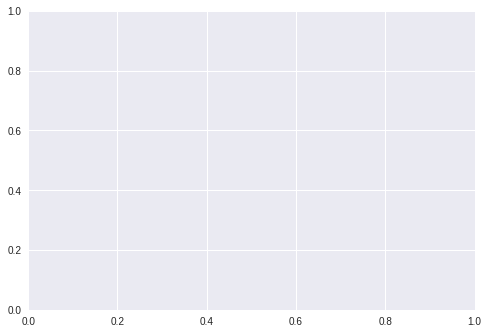

In [ ]:
width = .25
fig, ax = plt.subplots()

ax.bar(labels, non_healthy, width, label='Non-Healthy')
ax.bar(labels, healthy, width, bottom=non_healthy,
       label='Healthy')

ax.set_ylabel('Frequency')
ax.set_title('Frequency of Healthy and Non-Healthy by Age Group')
ax.legend()
plt.show()

## Sex Stacked Bar

In [ ]:
df_sex = df.groupby(['sex'])
df_sex['target'].value_counts(normalize=True)

sex  target
0    0         0.750890
     1         0.249110
1    1         0.614961
     0         0.385039
Name: target, dtype: float64

In [ ]:
sex_bucket = {1:'male',0:'female'}

In [ ]:
barwidth = .25

#Create list of [healthy data, non-healthy data] for each 

data_sex = []
for sb in list(sex_bucket.values()):
  data_tmp_sex = []
  sick_freq_sex = df_sex['target'].value_counts(normalize=True).loc[sb,'1']
  healthy_freq_sex = df_sex['target'].value_counts(normalize=True).loc[sb,'0']
  data_tmp_sex += [sb, sick_freq_sex, healthy_freq_sex]
  data_sex.append(data_tmp_sex)

labels_sex = [x[0] for x in data_sex]
non_healthy_sex = [x[1] for x in data_sex]
healthy_sex = [x[2] for x in data_sex ]


KeyError: ignored

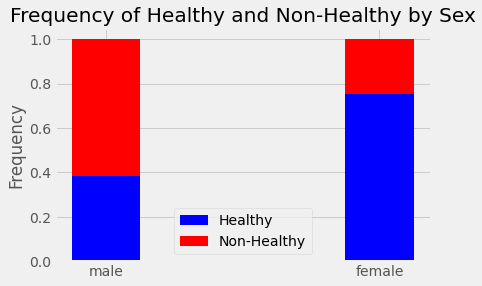

In [ ]:
width = .25
fig1, ax1 = plt.subplots()

ax1.bar(labels_sex, healthy_sex, width, label='Healthy', color='blue')
ax1.bar(labels_sex, non_healthy_sex, width, bottom=healthy_sex, label='Non-Healthy', color='red')

ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Healthy and Non-Healthy by Sex')
ax1.legend()
plt.show()

# Correlation Matrix

scipy - will show p-value

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


Convert Numeric Columns from object to int or float

In [ ]:
df.dtypes

age                      int64
sex                      int64
chest_pain_type          int64
resting_bp_s             int64
cholesterol              int64
fasting_blood_sugar      int64
resting_ecg              int64
max_heart_rate           int64
exercise_angina          int64
oldpeak                float64
st_slope                 int64
target                   int64
age_bucket               int64
age_bucket_str          object
dtype: object

In [ ]:
df.corr()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest_pain_type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting_bp_s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting_blood_sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting_ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max_heart_rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise_angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


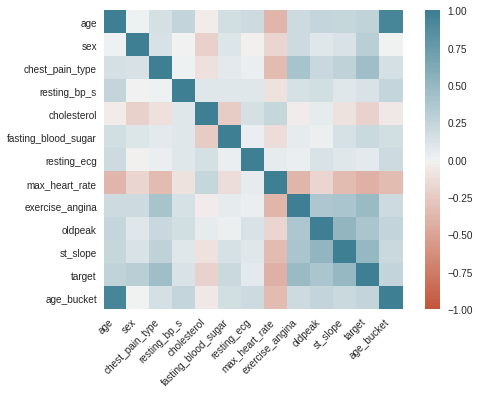

In [ ]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
df_corr_group = df[['age','age_bucket_str','resting_bp_s','cholesterol','max_heart_rate','oldpeak','target']]
df_healthy_corr = df_corr_group[df_corr_group['target'] == '0']
df_sick_corr = df_corr_group[df_corr_group['target'] == '1']

In [ ]:
df_healthy_corr.corr()

,age,resting_bp_s,cholesterol,max_heart_rate,oldpeak,target
age,NaN,NaN,NaN,NaN,NaN,NaN
resting_bp_s,NaN,NaN,NaN,NaN,NaN,NaN
cholesterol,NaN,NaN,NaN,NaN,NaN,NaN
max_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,NaN,NaN,NaN,NaN,NaN,NaN
target,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_sick_corr.corr()

,age,resting_bp_s,cholesterol,max_heart_rate,oldpeak,target
age,NaN,NaN,NaN,NaN,NaN,NaN
resting_bp_s,NaN,NaN,NaN,NaN,NaN,NaN
cholesterol,NaN,NaN,NaN,NaN,NaN,NaN
max_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,NaN,NaN,NaN,NaN,NaN,NaN
target,NaN,NaN,NaN,NaN,NaN,NaN


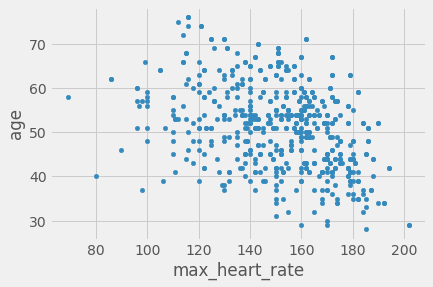

In [ ]:
# max heart rate vs age

data = pd.concat([df_healthy_corr['age'], df_healthy_corr['max_heart_rate']], axis=1)
data.plot.scatter(x='max_heart_rate', y= 'age');

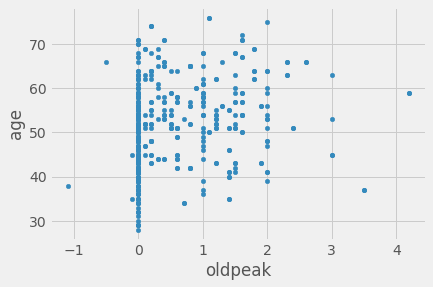

In [ ]:
# oldpeak vs age

data = pd.concat([df_healthy_corr['age'], df_healthy_corr['oldpeak']], axis=1)
data.plot.scatter(x='oldpeak', y= 'age');

In [ ]:
schema_df['oldpeak'].loc[0]

'Exercise induced ST-depression in comparison with the state of rest (Numeric)'

In [ ]:
df['oldpeak'].describe()

count    1190.000000
mean        0.922773
std         1.086337
min        -2.600000
25%         0.000000
50%         0.600000
75%         1.600000
max         6.200000
Name: oldpeak, dtype: float64

# Cholestrol T-test

In [ ]:
df_healthy['cholesterol'].describe()

count    561.000000
mean     231.657754
std       70.021658
min        0.000000
25%      201.000000
50%      232.000000
75%      268.000000
max      564.000000
Name: cholesterol, dtype: float64

In [ ]:
df_sick['cholesterol'].describe()

count    629.000000
mean     191.372019
std      119.734612
min        0.000000
25%      126.000000
50%      226.000000
75%      274.000000
max      603.000000
Name: cholesterol, dtype: float64

In [ ]:
c_v = ((561 - 1)*(70**2))+((629 - 1)*(119**2))/(561+629 - 2)
c_std = m.sqrt(v)

In [ ]:
c_se = c_std * m.sqrt((1/561) + (1/629))
c_se

96.32751655492467

In [ ]:
t_stat = 40/c_se
t_stat

0.4152499870293296

In [ ]:
c_df = 629+561 - 2
c_df

1188

In [ ]:
scipy.stats.t.sf(abs(t_stat),c_df)


0.3390169462694357

In [ ]:
tStat, pValue = stats.ttest_ind(df_healthy['cholesterol'], df_sick['cholesterol'], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:1.3866276323115328e-12 T-Statistic:7.174217814772026


# Max Heart Rate T-Test

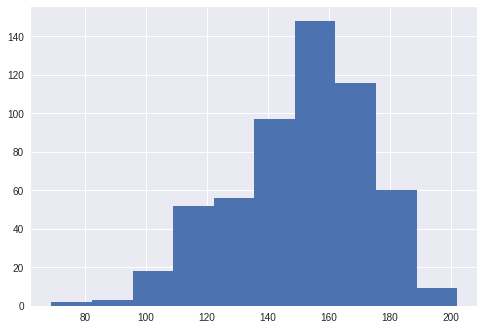

In [ ]:
df_healthy['max_heart_rate'].hist()

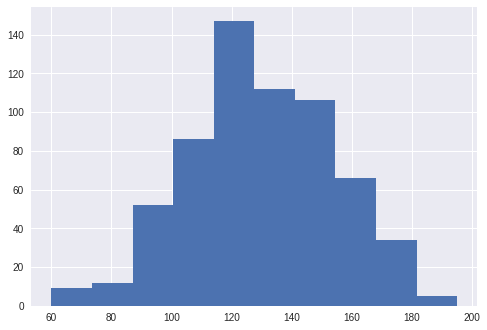

In [ ]:
df_sick['max_heart_rate'].hist()

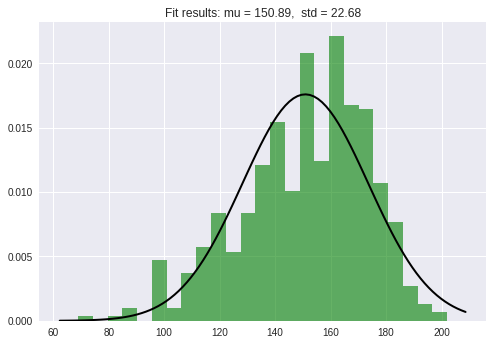

In [ ]:
from scipy.stats import norm

h_rate = df_healthy['max_heart_rate']

# Fit a normal distribution to the data:
mu, std = norm.fit(h_rate)

# Plot the histogram.
plt.hist(h_rate, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

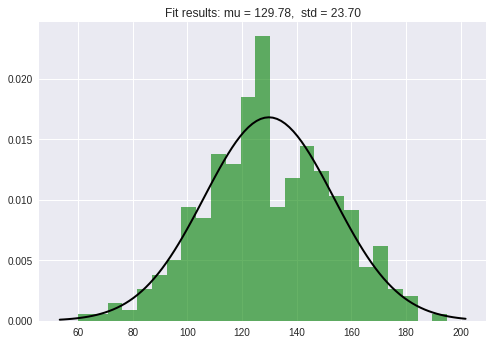

In [ ]:
s_rate = df_sick['max_heart_rate']

# Fit a normal distribution to the data:
mu, std = norm.fit(s_rate)

# Plot the histogram.
plt.hist(s_rate, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [ ]:
tStat, pValue = stats.ttest_ind(h_rate, s_rate) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:2.69412492337317e-50 T-Statistic:15.643025895094059
